### 컴퓨터공학부 201958008 김시연
### 과제 #3 Regression


#### 1) 데이터프레인 생성 3개의 샘플 출력, 특성개수와 샘플 개수 파악후 결측치 파악, 수치형과 범주형 특성 파악 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("HW3.csv")

In [3]:
data.head(3)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


#### 샘플수 400개 

In [6]:
data.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


#### 수치형특성 : Income, Limit, Rating, Cards, Age,  Education, Balance

In [8]:
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [9]:
data.Student.unique()

array(['No', 'Yes'], dtype=object)

In [10]:
data.Married.unique()

array(['Yes', 'No'], dtype=object)

In [11]:
data.Ethnicity.unique()

array(['Caucasian', 'Asian', 'African American'], dtype=object)

#### 범주형 특성 : Gender, Student, Married, Ethnicity 

In [17]:
data.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

#### 특성수 : 11개

In [14]:
data.isnull().sum()

Unnamed: 0    0
Income        0
Limit         0
Rating        0
Cards         0
Age           0
Education     0
Gender        0
Student       0
Married       0
Ethnicity     0
Balance       0
dtype: int64

####  결측치 없음

#### 2) 수치형 특성과 레이블로 히스토그램 작성, 범주형은 막대그래프 

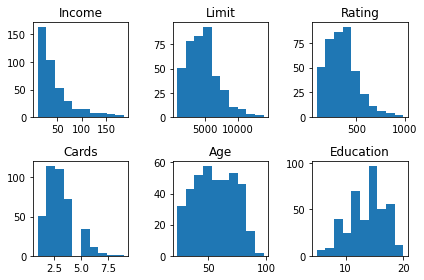

In [33]:
#레이블은 balance
plt.subplot(2,3,1)
plt.hist(data.Income,label=[data.Balance])
plt.title("Income")
plt.subplot(2,3,2)
plt.hist(data.Limit,label=[data.Balance])
plt.title("Limit")
plt.subplot(2,3,3)
plt.hist(data.Rating,label=[data.Balance])
plt.title("Rating")
plt.subplot(2,3,4)
plt.hist(data.Cards,label=[data.Balance])
plt.title("Cards")
plt.subplot(2,3,5)
plt.hist(data.Age,label=[data.Balance])
plt.title("Age")
plt.subplot(2,3,6)
plt.hist(data.Education,label=[data.Balance])
plt.title("Education")
plt.tight_layout()

#### 수치형 특성에서 Card에서 이상치가 보이며 Income, Limit, Rating에서는 왼쪽으로 치우친 그래프이다.

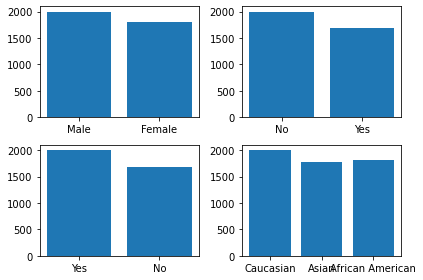

In [34]:
plt.subplot(2,2,1)
plt.bar(data.Gender,data.Balance)
plt.subplot(2,2,2)
plt.bar(data.Student,data.Balance)
plt.subplot(2,2,3)
plt.bar(data.Married,data.Balance)
plt.subplot(2,2,4)
plt.bar(data.Ethnicity,data.Balance)
plt.tight_layout()

####  범주형 특성에서는 큰 특징은 찾지 못했다

#### 3) corr() 메서드를 통해 상관계수 출력후 해석 

In [28]:
data.corr()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
Unnamed: 0,1.000000,0.037203,0.024172,0.021985,-0.036304,0.058603,-0.001415,0.006064
Income,0.037203,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.024172,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.021985,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.036304,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.058603,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.001415,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.006064,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


#### label인 Balance와는 Limit, Rating이 강한 상관을 보인다.

#### 4) 수치형 특성과 Balance 변수와의 산점도를 subplot으로 그려라

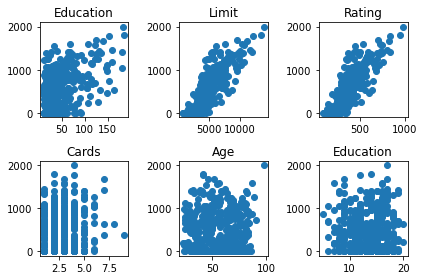

In [37]:
plt.subplot(2,3,1)
plt.scatter(data.Income,data.Balance)
plt.title("Education")
plt.subplot(2,3,2)
plt.scatter(data.Limit,data.Balance)
plt.title("Limit")
plt.subplot(2,3,3)
plt.scatter(data.Rating,data.Balance)
plt.title("Rating")
plt.subplot(2,3,4)
plt.scatter(data.Cards,data.Balance)
plt.title("Cards")
plt.subplot(2,3,5)
plt.scatter(data.Age,data.Balance)
plt.title("Age")
plt.subplot(2,3,6)
plt.scatter(data.Education,data.Balance)
plt.title("Education")

plt.tight_layout()

#### 5) Rating 변수를 특성으로 하고 Balance를 레이블로 단순선형회귀모델 훈련 

In [38]:
from sklearn.linear_model import LinearRegression

In [44]:
reg=LinearRegression()

In [46]:
X=data.Rating.to_numpy()

In [49]:
X=X.reshape(-1,1)

In [50]:
Y=data.Balance.to_numpy().reshape(-1,1)

In [52]:
reg.fit(X,Y)

LinearRegression()

In [53]:
print(reg.coef_,reg.intercept_)

[[2.56624033]] [-390.84634179]


In [55]:
pred=reg.predict(X)

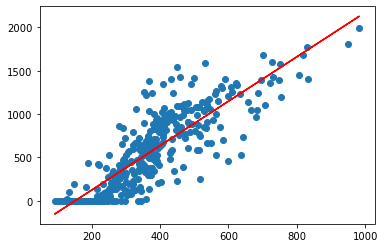

In [57]:
plt.scatter(X,Y)
plt.plot(X,pred,c="red")

In [59]:
reg.score(X,Y) #결정계수

0.7458484180585037

#### 6) 수치형 특성만 포함하여 훈련용, 테스트용 7:3 분할후 선형회귀 훈련, 결정계수 구하라

In [115]:
A=data.drop(['Gender','Student','Married','Balance','Ethnicity','Unnamed: 0'],axis=1).to_numpy()

In [116]:
B=data['Balance'].to_numpy()

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
A_train,A_test,B_train,B_test=train_test_split(A,B,train_size=0.7,random_state=1)

In [119]:
A_train.shape

(280, 6)

In [120]:
B_train.shape

(280,)

In [121]:
new_reg=LinearRegression()

In [122]:
new_reg.fit(A_train,B_train)

LinearRegression()

In [123]:
print(new_reg.coef_,new_reg.intercept_)

[-7.31861767  0.10453828  2.36325486 12.56245135 -0.90775398  2.597831  ] -508.7496583830859


#### 결정계수

In [124]:
new_reg.score(A_train,B_train)

0.8790707625358731

In [125]:
new_reg.score(A_test,B_test)

0.8747547884667081

#### 훈련과 검증이 성능은 비슷하나 그리 좋은 성능은 아니므로 과소적합이 의심스럽다

In [139]:
# 값 예측
test=np.array(['100','6000','550','5','55','20'],dtype=float).reshape(1,-1)

In [140]:
test

array([[1.0e+02, 6.0e+03, 5.5e+02, 5.0e+00, 5.5e+01, 2.0e+01]])

In [141]:
test.shape

(1, 6)

In [142]:
new_reg.predict(test)

array([751.25081278])

#### 751.25081278로 예측 